<a href="https://colab.research.google.com/github/ChrisHallak/Sentiment-analysis-of-COVID-19-vaccine-through-tweets/blob/main/Sentiment_Analysis_of_Covid19_Vaccines_Tweets_Using_NLP_(Preprocessing_Visualization_Embedding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1]: Prepare libraries and data

In [ ]:
!pip install emoji
!pip install camel.tools
!pip install Arabic-Stopwords
!pip install qalsadi
!pip install arabic-reshaper
!pip install python-bidi

## [1.1] Include important libraries

In [ ]:
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.normalize import normalize_alef_ar
import arabicstopwords.arabicstopwords as stp
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt
from bidi.algorithm import get_display
import qalsadi.lemmatizer
import unicodedata as ud
import seaborn as seb
import arabic_reshaper
import string
import pandas as pd
import re
import nltk
import emoji
import numpy as np



lemmer = qalsadi.lemmatizer.Lemmatizer()
sw = stp.stopwords_list()


## [1.2] Download data

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI' -O 'final_data.zip'

--2021-12-06 04:02:02--  https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI
Resolving drive.google.com (drive.google.com)... 172.217.204.101, 172.217.204.102, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3fr3unlgsobj83qtce6fg8qfmnk6pkf4/1638763275000/04260309330816471542/*/1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI?e=download [following]
--2021-12-06 04:02:03--  https://doc-0o-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3fr3unlgsobj83qtce6fg8qfmnk6pkf4/1638763275000/04260309330816471542/*/1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI?e=download
Resolving doc-0o-00-docs.googleusercontent.com (doc-0o-00-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to doc-0o-00-docs.googleusercontent.com (d

In [ ]:
!unzip final_data.zip

Archive:  final_data.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: valid.csv               


## [1.3] read data from csv file

In [ ]:
df = pd.read_csv('train.csv')
df.head()

tweet  label
0  #ÿ™ÿ®ŸÜŸä_ŸÇÿ∑ÿ∑_ÿßŸÜŸÇÿßÿ∞ ŸÖŸÜ ÿßŸÑÿÆÿßÿµ ŸáÿßÿßÿßÿßŸÖ ŸÉŸäÿ™ŸÜ ÿ£ŸÜÿ´Ÿâ ÿπŸÖÿ±Ÿá...      2
1  '#ÿÆÿ∞_ÿßŸÑÿÆÿ∑Ÿàÿ©_ÿÆÿ∞_ÿßŸÑŸÑŸÇÿßÿ≠ \nÿßŸÑÿ≠ŸÖÿØÿßŸÑŸÑŸá ŸÖŸÜ ŸÇÿ®ŸÑ ŸàŸÖŸÜ ÿ®...      1
2  ŸÑŸà ÿßŸÑŸÑŸä ŸÖÿ´ŸÑŸÉ Ÿàÿ¥ÿ±ŸàÿßŸÉ ÿ∑ÿπŸÖŸà ŸÉÿßŸÜ ŸÇÿØ ÿ≠ÿ∞ŸÅŸÜÿß ÿßŸÑŸÉŸÖÿßŸÖÿßÿ™...      1
3  #ÿßŸÑÿµÿ≠ÿ©:‚Ä¢ŸÜÿ≠Ÿà 14.5 ŸÖŸÑŸäŸàŸÜ ÿ¥ÿÆÿµ ÿ™ŸÖ ÿ•ÿπÿ∑ÿßÿ§ŸáŸÖ ÿ¨ÿ±ÿπÿ© ŸÑŸÇÿß...      1
4  ‚Ä¢ ŸÅŸä ŸÖŸÜÿ∏Ÿàÿ± ÿßŸÑŸÇŸàÿ© ÿßŸÑÿ®ÿ¥ÿ±Ÿäÿ© ( ÿßŸÑÿ£ÿ≤ŸÖÿ© ÿ≥ÿ™ÿ∑ŸàŸÑ ŸÑÿ£ÿ¥Ÿáÿ± ...      3

# [2]: Cleaning And Normalization

## [2.1] Removing Mentions


In [ ]:
# ÿ™ÿßÿ®ÿπ ŸÑÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÖŸÜÿ¥ŸÜÿßÿ™ ÿ•ÿ∞ÿß ŸÉÿßŸÜÿ™ ŸÇŸäŸÖÿ© ÿßŸÑŸÖÿ™ÿ∫Ÿäÿ± ÿßŸÑÿ®ŸàŸÑŸäÿßŸÜŸä 1 ŸÜŸÇŸàŸÖ ÿ®ÿ≠ÿ∞ŸÅ ÿßŸÑŸÖŸÜÿ¥ŸÜÿßÿ™ Ÿàÿ•ŸÑÿß ÿ≥ÿ™ÿ±ÿ¨ÿπ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿ© ŸÉŸÖÿß ŸáŸä
# ÿßŸÑÿØÿÆŸÑ ÿπÿ®ÿßÿ±ÿ© ÿπŸÜ ÿ™ÿ∫ÿ±ŸäÿØÿ©
# ÿßŸÑÿÆÿ±ÿ¨ ÿ™ÿ∫ÿ±ŸäÿØÿ© ÿÆÿßŸÑŸäÿ© ŸÖŸÜ ÿßŸÑŸÖŸÜÿ¥ŸÜÿßÿ™

def remove_mentions(tweet,work = 1):
  if work == 1:
    tweet = re.sub(r"@\S+", '', tweet)
  return tweet


##### testing function
test = df['tweet'][25]
print("tweet before cleaning : " , test , '\n--------------------------------------------------')
print("tweet after cleaning : " ,remove_mentions(test))

tweet before cleaning :  @NajlaQahtani1 ÿßŸÑÿµÿ≠ÿ©...  
--------------------------------------------------
tweet after cleaning :   ÿßŸÑÿµÿ≠ÿ©... 


## [2.2] Removing Hyperlinks


In [ ]:
# ÿ™ÿßÿ®ÿπ ŸÑÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ±Ÿàÿßÿ®ÿ∑ ÿ•ÿ∞ÿß ŸÉÿßŸÜÿ™ ŸÇŸäŸÖÿ© ÿßŸÑŸÖÿ™ÿ∫Ÿäÿ± ÿßŸÑÿ®ŸàŸÑŸäÿßŸÜŸä 1 ŸÜŸÇŸàŸÖ ÿ®ÿ≠ÿ∞ŸÅ ÿßŸÑÿ±Ÿàÿßÿ®ÿ∑ Ÿàÿ•ŸÑÿß ÿ≥ÿ™ÿ±ÿ¨ÿπ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿ© ŸÉŸÖÿß ŸáŸä
# ÿßŸÑÿØÿÆŸÑ ÿ™ÿ∫ÿ±ŸäÿØÿ©
# ÿßŸÑÿÆÿ±ÿ¨ ÿ™ÿ∫ÿ±ŸäÿØÿ© ÿÆÿßŸÑŸäÿ© ŸÖŸÜ ÿßŸÑÿ±Ÿàÿßÿ®ÿ∑

def remove_hyperlinks(tweet,work=1):
  if work == 1:
    tweet = re.sub(r'https?\S+', '', tweet)
  return tweet

###======================================================================

##### testing function
test = df['tweet'][10]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_hyperlinks(test))

tweet before cleaning :  ÿ±Ÿàÿ∂ÿ© Ÿáÿ®ÿßÿ≥ ÿ™ÿ®ÿπÿØ ÿπŸÜ ŸÖÿ±ŸÉÿ≤ ÿßŸÑÿ¥ÿπÿ®ÿ© 80 ŸÉŸÑŸÖ ÿ∞ Ÿàÿπ. https://t.co/ragWfqz3ii 
--------------------------------------------------------------------
tweet after cleaning :  ÿ±Ÿàÿ∂ÿ© Ÿáÿ®ÿßÿ≥ ÿ™ÿ®ÿπÿØ ÿπŸÜ ŸÖÿ±ŸÉÿ≤ ÿßŸÑÿ¥ÿπÿ®ÿ© 80 ŸÉŸÑŸÖ ÿ∞ Ÿàÿπ. 


## [2.3] Removing Pictures Links


In [ ]:
# ÿ™ÿßÿ®ÿπ ŸÑÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ±Ÿàÿßÿ®ÿ∑ ÿ•ÿ∞ÿß ŸÉÿßŸÜÿ™ ŸÇŸäŸÖÿ© ÿßŸÑŸÖÿ™ÿ∫Ÿäÿ± ÿßŸÑÿ®ŸàŸÑŸäÿßŸÜŸä 1 ŸÜŸÇŸàŸÖ ÿ®ÿ≠ÿ∞ŸÅ ÿ±Ÿàÿßÿ®ÿ∑ ÿßŸÑÿµŸàÿ± Ÿàÿ•ŸÑÿß ÿ≥ÿ™ÿ±ÿ¨ÿπ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿ© ŸÉŸÖÿß ŸáŸä
# ÿßŸÑÿØÿÆŸÑ ÿ™ÿ∫ÿ±ŸäÿØÿ©
# ÿßŸÑÿÆÿ±ÿ¨ ÿ™ÿ∫ÿ±ŸäÿØÿ© ÿÆÿßŸÑŸäÿ© ŸÖŸÜ ÿ±Ÿàÿßÿ®ÿ∑ ÿµŸàÿ±

def remove_picURL(tweet,work = 1):
  if work == 1:
    tweet = re.sub(r'pic.twitter.com/[\w]*',"", tweet)
  return tweet

###======================================================================

#### ÿ™ÿßÿ®ÿπ ÿ•ÿ∂ÿßŸÅŸä ŸÑŸÉŸÜ ŸÑÿßŸäŸàÿ¨ÿØ ŸÅŸä ÿßŸÑÿØÿßÿ™ÿß ÿ≥Ÿäÿ™ ÿßŸÑÿ≠ÿßŸÑŸäÿ© ŸÖÿ´ÿßŸÑ ÿπŸÑŸäŸáÿß ŸÑŸÑÿ™ÿ¨ÿ±Ÿäÿ® ŸÑÿ∞ÿß ÿ≥Ÿäÿ™ŸÖ ÿ™ÿ¨ÿ±Ÿäÿ® ŸÖÿ´ÿßŸÑ ÿÆÿßÿ±ÿ¨Ÿä
test = "corona virus looks like pic.twitter.com/corona"
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_picURL(test))

tweet before cleaning :  corona virus looks like pic.twitter.com/corona 
--------------------------------------------------------------------
tweet after cleaning :  corona virus looks like 


## [2.4] Removing Frequency Letters


In [ ]:
# ÿ™ÿßÿ®ÿπ ŸÑÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ£ÿ≠ÿ±ŸÅ ÿßŸÑÿ≤ÿßÿ¶ÿØÿ© ŸÖÿ´ŸÑ ŸÉŸàŸàŸàÿ±ŸàŸÜÿß Ÿàÿ™ÿ±ŸÉ ÿ≠ÿ±ŸÅ Ÿàÿßÿ≠ÿØ ŸÖŸÜ ÿßŸÑÿ™ŸÉÿ±ÿ±ÿßÿ™ ŸàŸáŸà ŸÜŸàÿπ ŸÖŸÜ ÿ™Ÿàÿ≠ŸäÿØ ŸÉÿ™ÿßÿ®ÿ© ÿßŸÑŸÉŸÑŸÖÿßÿ™

def remove_extraLetters(tweet,work =1):
  if work == 1:
     tweet = re.sub(r'(.)\1+', r'\1', tweet)
  return tweet

###======================================================================

##### testing function
test = df['tweet'][0]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_extraLetters(test))

########### ŸÉŸÑŸÖÿ© ŸáÿßÿßÿßÿßÿßÿßÿßŸÖ ÿ£ÿµÿ®ÿ≠ÿ™ ŸáÿßŸÖ

tweet before cleaning :  #ÿ™ÿ®ŸÜŸä_ŸÇÿ∑ÿ∑_ÿßŸÜŸÇÿßÿ∞ ŸÖŸÜ ÿßŸÑÿÆÿßÿµ ŸáÿßÿßÿßÿßŸÖ ŸÉŸäÿ™ŸÜ ÿ£ŸÜÿ´Ÿâ ÿπŸÖÿ±Ÿáÿß Ÿ•Ÿ© ŸäŸàŸÖ ÿßÿÆÿ∞ÿ™Ÿáÿß ÿ≠ÿØŸäÿ´Ÿá ÿßŸÑŸàŸÑÿßÿØŸá ÿπŸÖÿ±Ÿáÿß Ÿ£ ÿßŸäÿßŸÖ ÿ™ŸÖ ÿßŸÑÿ™ÿ∑ÿπŸäŸÖ ÿßŸÖÿ≥ ÿ≥ÿ®ÿ® ÿßŸÑÿπÿ±ÿ∂ ŸÑŸÑÿ™ÿ®ŸÜŸä ÿßŸÜÿß ÿßÿπÿ™ŸÜŸä ÿ®ÿßŸÑŸÇÿ∑ÿ∑ ÿ≠ÿØŸäÿ´Ÿá ÿßŸÑŸàŸÑÿßÿØŸá  ŸàÿπŸÜÿØ ÿßŸÉÿ™ŸÖÿßŸÑ ÿ¥Ÿáÿ±ŸäŸÜ Ÿäÿ≠ÿ™ÿßÿ¨Ÿàÿß ŸÖÿ≥ÿßÿ≠ÿ©  ŸàÿßŸÜÿß ŸÖÿß ÿπŸÜÿØŸä ŸáÿßÿØŸä ŸÑŸàÿ¨ŸàÿØ ÿßŸÉÿ´ÿ± ŸÖŸÜ Ÿß ŸÇÿ∑ÿ∑ ÿ≠ÿØŸäÿ´Ÿá ÿßŸÑŸàŸÑÿßÿØŸá ŸÑŸÑÿ™ŸàÿßÿµŸÑ @saad28234346 ÿßŸÑÿ™ÿ®ŸÜŸä ÿßŸÑÿ±Ÿäÿßÿ∂  
--------------------------------------------------------------------
tweet after cleaning :  #ÿ™ÿ®ŸÜŸä_ŸÇÿ∑_ÿßŸÜŸÇÿßÿ∞ ŸÖŸÜ ÿßŸÑÿÆÿßÿµ ŸáÿßŸÖ ŸÉŸäÿ™ŸÜ ÿ£ŸÜÿ´Ÿâ ÿπŸÖÿ±Ÿáÿß Ÿ•Ÿ© ŸäŸàŸÖ ÿßÿÆÿ∞ÿ™Ÿáÿß ÿ≠ÿØŸäÿ´Ÿá ÿßŸÑŸàŸÑÿßÿØŸá ÿπŸÖÿ±Ÿáÿß Ÿ£ ÿßŸäÿßŸÖ ÿ™ŸÖ ÿßŸÑÿ™ÿ∑ÿπŸäŸÖ ÿßŸÖÿ≥ ÿ≥ÿ® ÿßŸÑÿπÿ±ÿ∂ ŸÑÿ™ÿ®ŸÜŸä ÿßŸÜÿß ÿßÿπÿ™ŸÜŸä ÿ®ÿßŸÑŸÇÿ∑ ÿ≠ÿØŸäÿ´Ÿá ÿßŸÑŸàŸÑÿßÿØŸá ŸàÿπŸÜÿØ ÿßŸÉÿ™ŸÖÿßŸÑ ÿ¥Ÿáÿ±ŸäŸÜ Ÿäÿ≠ÿ™ÿßÿ¨Ÿàÿß ŸÖÿ≥ÿßÿ≠ÿ© ŸàÿßŸÜÿß ŸÖÿß ÿπŸÜÿØŸä ŸáÿßÿØŸä ŸÑŸàÿ¨ŸàÿØ ÿßŸÉÿ´ÿ± ŸÖŸÜ Ÿß ŸÇÿ∑ ÿ≠ÿØŸäÿ´Ÿá 

 ÿ≥ÿ®ÿ® ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ£ÿ≠ÿ±ŸÅ ÿßŸÑŸÖÿ™ŸÉÿ±ÿ±ÿ© :
 ÿπŸÜÿØ ÿßŸÑŸÉÿ™ÿßÿ®ÿ© ÿ®ÿßŸÑŸÑÿ∫ÿ© ÿßŸÑÿπÿßŸÖŸäÿ© ŸÑÿßŸäŸàÿ¨ÿØ ŸÇÿßÿπÿØÿ© ÿπÿßŸÖÿ© ŸÑŸÉÿ™ÿßÿ®ÿ© ÿßŸÑŸÉŸÑŸÖÿ© Ÿàÿ®ÿßŸÑÿ™ÿßŸÑŸä ÿ≥ŸäŸÜÿ™ÿ¨
 ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ™Ÿä ÿ™ŸÉÿ™ÿ® ÿ®ÿ∑ÿ±ŸÇ ÿ®ÿ∑ÿ±ŸÇ ŸÖÿÆÿ™ŸÑŸÅÿ© ŸÖÿ´ŸÑ ÿ™ŸÉÿ±ÿßÿ± ÿ£ÿ≠ÿ±ŸÅ ŸÖÿπŸäŸÜÿ©
 ŸÑÿ∞ŸÑŸÉ Ÿäÿ¨ÿ® ÿ•ÿ≤ÿßŸÑÿ© Ÿáÿ∞Ÿá ÿßŸÑÿ£ÿ≠ÿ±ŸÅ ŸÉŸÜŸàÿπ ŸÖŸÜ ÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑÿØÿßÿ™ÿß ŸàŸáÿ∞ÿß ŸäŸÅŸäÿØ ŸÅŸä ÿ™ŸÇŸÑŸäŸÑ ÿßŸÑngram

## [2.5] Removing Non_Arabic Characters, Numbers,Special Characters


In [ ]:
# (ÿ£ÿ±ŸÇÿßŸÖ Ÿàÿ£ÿ≠ÿ±ŸÅ ŸàŸÖÿ≠ÿßÿ±ŸÅ ŸÖŸÖŸäÿ≤ÿ© ŸÖÿ´ŸÑ ÿßŸÑÿ£ŸÇŸàÿßÿ≥) ÿ™ÿßÿ®ÿπ ŸÑÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÖÿ≠ÿßÿ±ŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿßŸÑÿπÿ±ÿ®Ÿäÿ©
# ÿßŸÑÿØÿÆŸÑ ÿ™ÿ∫ÿ±ŸäÿØÿ©
#  ÿßŸÑÿÆÿ±ÿ¨ ÿ™ÿ∫ÿ±ŸäÿØÿ© ÿÆÿßŸÑŸäÿ© ŸÖŸÜ ŸÉŸÑ ÿßŸÑŸÖÿ≠ÿßÿ±ŸÅ ÿßŸÑÿ∫Ÿäÿ± ÿßŸÑÿπÿ±ÿ®Ÿäÿ©
# \u0600-\u06FF ÿßŸÑŸÉŸàÿØ ŸÑŸÑÿ£ÿ≠ÿ±ŸÅ ÿßŸÑÿπÿ±ÿ®Ÿäÿ©

def remove_non_arabic_characters(tweet,work=1):
  if work == 1:
    tweet = re.sub(r"[^\u0600-\u06FF]+", " ",tweet);
  return tweet

###======================================================================

####### testing function
test = df['tweet'][15]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_non_arabic_characters(test))

###### ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖÿ´ÿßŸÑ ÿ™ŸÖ ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ£ÿ±ŸÇÿßŸÖ ÿßŸÑÿßŸÜŸÉŸÑŸäÿ≤Ÿäÿ© ŸàÿßŸÑÿ£ÿ≠ÿ±ŸÅ ÿßŸÑÿßŸÜŸÉŸÑŸäÿ≤Ÿäÿ© ŸàÿßŸÑÿ£ŸÇŸàÿßÿ≥

tweet before cleaning :  '14 ÿßÿ®ÿ±ŸäŸÑ  \nÿ¨ÿ±ÿπÿ© ŸÑŸÇÿßÿ≠ ŸÉŸàÿ±ŸàŸÜÿß (ÿßŸÉÿ≥ŸÅŸàÿ±ÿØ)ÿßŸÑÿßŸàŸÑŸâ ‚úÖ'  
--------------------------------------------------------------------
tweet after cleaning :   ÿßÿ®ÿ±ŸäŸÑ ÿ¨ÿ±ÿπÿ© ŸÑŸÇÿßÿ≠ ŸÉŸàÿ±ŸàŸÜÿß ÿßŸÉÿ≥ŸÅŸàÿ±ÿØ ÿßŸÑÿßŸàŸÑŸâ 


ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ£ÿ±ŸÇÿßŸÖ ŸÑŸäÿ≥ÿ™ ÿØÿßÿ¶ŸÖÿß ÿ∑ÿ±ŸäŸÇÿ© ŸÅÿπÿßŸÑÿ© ŸÑÿ£ŸÜŸá ŸÅŸä ÿ®ÿπÿ∂ ÿßŸÑÿ≠ÿßŸÑÿßÿ™ ŸÜÿÆÿ≥ÿ± ŸÖÿπŸÑŸàŸÖÿßÿ™ ŸáÿßŸÖÿ© ÿ•ÿ∞ÿß ÿ™ŸÖ ÿ≠ÿ∞ŸÅŸáÿß ŸÖÿ´ÿßŸÑ ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑÿ±ŸÇŸÖ ŸÖŸÜ ÿ£ÿµŸÑ ÿßŸÑÿßÿ≥ŸÖ ŸÖÿ´ŸÑ ŸÉŸàŸÅŸäÿØ-19
ÿ£Ÿà ŸÅŸä ÿ≠ÿßŸÑ ÿßŸÑÿπÿØÿØ Ÿäÿπÿ∑Ÿä ÿ£ŸáŸÖŸäÿ© ŸÑŸÑÿ¨ŸÖŸÑÿ© ŸÖÿ´ŸÑ ÿ™ÿ∫ÿ±ŸäÿØÿ© ÿ™ŸÖ ÿßÿÆÿØ ÿßŸÑŸÑŸÇÿßÿ≠ ŸÖŸÜ ŸÇÿ®ŸÑ 3 ŸÖŸÑŸäŸàŸÜ ÿ¥ÿÆÿµ ŸÅŸáŸÜÿß ŸäÿØŸÑ ÿπŸÑŸâ ÿßŸÑÿπÿØÿØ ÿßŸÑŸÉÿ®Ÿäÿ± ÿßŸÑÿ∞Ÿä ÿ™ŸÑŸÇŸâ ÿßŸÑŸÑŸÇÿßÿ≠ ŸÑÿ•ÿ∏Ÿáÿßÿ± ÿ£ŸáŸÖŸäÿ™Ÿá


## [2.6] Removing Emojis


In [ ]:
def remove_emojies(tweet,work = 1):
  if work == 1:
    return emoji.get_emoji_regexp().sub(r'', tweet)

###======================================================================

####### testing function
test = df['tweet'][33]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_emojies(test))

tweet before cleaning :  @ZdashtiZ @CGCKuwait ŸÖÿ≥ŸÉŸäŸÜŸá ŸÖŸà ŸÇÿßÿµ ÿπŸÑŸäŸáÿß üòÇüòÇüòÇŸàŸÇÿßŸÑ ÿßŸÜ ÿßŸÑÿ™ÿ∑ÿπŸäŸÖ Ÿäÿ≠ŸÖŸä üòÇüòÇüòÇ ŸäÿÆÿ™Ÿä ŸàÿßŸÑŸÑŸá ÿπŸÑŸâ ÿßŸÑÿ∞ŸÉÿßÿ° 
--------------------------------------------------------------------
tweet after cleaning :  @ZdashtiZ @CGCKuwait ŸÖÿ≥ŸÉŸäŸÜŸá ŸÖŸà ŸÇÿßÿµ ÿπŸÑŸäŸáÿß ŸàŸÇÿßŸÑ ÿßŸÜ ÿßŸÑÿ™ÿ∑ÿπŸäŸÖ Ÿäÿ≠ŸÖŸä  ŸäÿÆÿ™Ÿä ŸàÿßŸÑŸÑŸá ÿπŸÑŸâ ÿßŸÑÿ∞ŸÉÿßÿ°


## [2.7] Removing Punctuations


In [ ]:
# unicodedata Ÿäÿ≥ÿßÿπÿØ ŸÅŸä ŸÖÿπÿ±ŸÅÿ© ŸÅŸäŸÖÿß ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑŸÖÿ≠ÿ±ŸÅ ÿπŸÑÿßŸÖÿ© ÿ™ÿ±ŸÇŸäŸÖ ÿ£Ÿà ŸÑÿß
# ÿßŸÑÿÆÿ±ÿ¨ ŸäŸÉŸàŸÜ ÿπÿ®ÿßÿ±ÿ© ÿ≠ÿ±ŸÅŸäŸÜ ŸÑŸÖÿπÿ±ŸÅÿ© ŸÜŸàÿπ ÿßŸÑŸÖÿ≠ÿ±ŸÅ ud.category
# ÿ•ÿ∞ÿß ŸÉÿßŸÜ ÿßŸÑŸÉŸÑÿßÿ≥ ÿßŸÑÿ∞Ÿä ŸäŸÜÿ™ŸÖŸä ÿ•ŸÑŸäŸá Ÿäÿ®ÿØÿ£ ÿ®ÿ≠ÿ±ŸÅ ÿßŸÑÿ®Ÿä ŸäŸÉŸàŸÜ ÿßŸÑŸÖÿ≠ÿ±ŸÅ ÿπŸÑÿßŸÖÿ© ÿ™ÿ±ŸÇŸäŸÖ
# LL , PO  {L : Letter} {L : Lower} {P : Punctuation} {O : Other}
# ŸÑŸÉŸÜ ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ™ÿ±ŸÇŸäŸÖ ŸÅŸä Ÿáÿ∞Ÿá ÿßŸÑŸÖŸÖŸÉÿ™ÿ®ÿ© ÿ™ÿ™ÿ∂ŸÖŸÜ ÿßŸÑŸáÿßÿ¥ÿ™ÿßÿ∫ ŸÑÿ∞ŸÑŸÉ ÿ™ŸÖ Ÿàÿ∂ÿπ ÿ¥ÿ±ÿ∑ ÿßŸÑÿßŸàÿ±

def remove_punctuations(tweet,work = 1):
  if work == 1:
    clean_tweet = ""
    for c in tweet:
      if  ud.category(c).startswith('P') == 1 :
        clean_tweet += " "
      else :
        clean_tweet += c
    return clean_tweet
  else :
      return tweet
###======================================================================

####### testing function
test = df['tweet'][55]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_punctuations(test))



tweet before cleaning :  ŸáŸà ŸàŸäŸÜ ÿßŸÑÿ™ÿ∑ÿπŸäŸÖ ÿßŸÑŸÑŸä Ÿäÿ≥ŸàŸÑŸÅŸàŸÜ ÿπŸÜŸáÿü 
--------------------------------------------------------------------
tweet after cleaning :  ŸáŸà ŸàŸäŸÜ ÿßŸÑÿ™ÿ∑ÿπŸäŸÖ ÿßŸÑŸÑŸä Ÿäÿ≥ŸàŸÑŸÅŸàŸÜ ÿπŸÜŸá 


## [2.8] Removing StopWords


In [ ]:
# arabicstopwords ŸÖŸÉÿ™ÿ®ÿ© ÿ™ÿ¨ŸÖÿπ ŸÉŸÑ ŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ™ŸàŸÇŸÅ ÿ®ÿßŸÑŸÑÿ∫ÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ©
# sw ŸÇÿßÿ¶ŸÖÿ© ÿ®ÿ¨ŸÖŸäÿπ ŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ™ŸàŸÇŸÅ

def remove_stopwords(tweet,work = 1):
  if work == 1:
    tokens = tweet.split()
    tweet = " ".join([token for token in  tokens if token not in sw])
  return tweet
###======================================================================

####### testing function
test = df['tweet'][360]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,remove_stopwords(test))

tweet before cleaning :  ŸÜŸÜÿ™ÿ∏ÿ± ÿ≥ŸÇŸàÿ∑ ŸÑŸÇÿßÿ≠ ŸÉŸàÿ±ŸàŸÜÿß ÿπŸÑŸâ ÿ£ÿ≠ÿ± ŸÖŸÜ ÿßŸÑÿ¨ŸÖÿ± 
--------------------------------------------------------------------
tweet after cleaning :  ŸÜŸÜÿ™ÿ∏ÿ± ÿ≥ŸÇŸàÿ∑ ŸÑŸÇÿßÿ≠ ŸÉŸàÿ±ŸàŸÜÿß ÿ£ÿ≠ÿ± ÿßŸÑÿ¨ŸÖÿ±


## [2.9] Normalizations


In [ ]:
# ÿ™ŸÖ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÉÿßŸÖŸÑ ÿ™ŸàŸÑÿ≤ ŸÖŸÜ ÿ£ÿ¨ŸÑ ÿπŸÖŸÑÿßÿ™ ÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑÿ£ŸÑŸÅ ŸàÿßŸÑÿ™ÿßÿ° ÿßŸÑŸÖÿ±ÿ®Ÿàÿ∑ÿ© ŸàÿßŸÑÿ£ŸÑŸÅ ÿßŸÑŸÖŸÇÿµŸàÿ±ÿ©

def orthographic_normalization(tweet,work = 1):
  if work == 1:
    tweet = normalize_alef_ar(tweet)
    tweet = normalize_alef_maksura_ar(tweet)
    tweet = normalize_teh_marbuta_ar(tweet)
  return tweet

###======================================================================

  ####### testing function
test = df['tweet'][15]
print("tweet before cleaning : " , test , '\n--------------------------------------------------------------------')
print("tweet after cleaning : " ,orthographic_normalization(test))

tweet before cleaning :  '14 ÿßÿ®ÿ±ŸäŸÑ  \nÿ¨ÿ±ÿπÿ© ŸÑŸÇÿßÿ≠ ŸÉŸàÿ±ŸàŸÜÿß (ÿßŸÉÿ≥ŸÅŸàÿ±ÿØ)ÿßŸÑÿßŸàŸÑŸâ ‚úÖ'  
--------------------------------------------------------------------
tweet after cleaning :  '14 ÿßÿ®ÿ±ŸäŸÑ  \nÿ¨ÿ±ÿπŸá ŸÑŸÇÿßÿ≠ ŸÉŸàÿ±ŸàŸÜÿß (ÿßŸÉÿ≥ŸÅŸàÿ±ÿØ)ÿßŸÑÿßŸàŸÑŸä ‚úÖ' 


## [2.10] Lemmatization


In [ ]:
def lemmatization(tweet ,work = 1):
  if work == 1:
    lemmas = lemmer.lemmatize_text(tweet)
  return " ".join(lemmas)

###======================================================================

####### testing function
test = df['tweet'][3]
print("tweet before cleaning : ",test)
print("tweet after cleaning : " ,lemmatization(test))


tweet before cleaning :  #ÿßŸÑÿµÿ≠ÿ©:‚Ä¢ŸÜÿ≠Ÿà 14.5 ŸÖŸÑŸäŸàŸÜ ÿ¥ÿÆÿµ ÿ™ŸÖ ÿ•ÿπÿ∑ÿßÿ§ŸáŸÖ ÿ¨ÿ±ÿπÿ© ŸÑŸÇÿßÿ≠ #ŸÉŸàÿ±ŸàŸÜÿß‚Ä¢ÿßŸÑŸÑŸÇÿßÿ≠ÿßÿ™ ÿ¢ŸÖŸÜÿ© Ÿàÿ®ÿ•ŸÖŸÉÿßŸÜ ŸÉŸÑ ŸÖŸÜ ÿ™ŸÑŸÇŸâ ÿßŸÑŸÑŸÇÿßÿ≠ ÿßŸÑÿ™ÿ®ÿ±ÿπ ÿ®ÿßŸÑÿØŸÖ‚Ä¢ŸäŸÖŸÉŸÜ ÿ™ŸÑŸÇŸä ÿ¨ÿ±ÿπÿßÿ™ ŸÖÿÆÿ™ŸÑŸÅÿ© ŸÖŸÜ ŸÑŸÇÿßÿ≠ ŸÉŸàÿ±ŸàŸÜÿß
tweet after cleaning :  # ÿµÿ≠ÿ© :‚Ä¢ ŸÜÿ≠Ÿà 14 . 5 ŸÖŸÑŸäŸàŸÜ ÿ¥ÿÆÿµ ÿ™ŸÖ ÿ•ÿπÿ∑ÿßÿ° ÿ¨ÿ±ÿπÿ© ŸÑŸÇÿßÿ≠ # ŸÉÿßÿ± ‚Ä¢ ŸÑŸÇÿßÿ≠ ÿ¢ŸÖŸÜ ÿ•ŸÖŸÉÿßŸÜ ŸÉŸÑ ŸÖŸÜ ÿ£ŸÑŸÇŸâ ŸÑŸÇÿßÿ≠ ÿ™ÿ®ÿ±ÿπ ÿØŸÖ ‚Ä¢ ŸäŸÖ ÿ£ŸÑŸÇŸâ ÿ¨ÿ±ÿπÿ© ŸÖÿÆÿ™ŸÑŸÅ ŸÖŸÜ ŸÑŸÇÿßÿ≠ ŸÉÿßÿ±


## [2.11] Removing Null Rows


In [ ]:
# ÿ™ÿßÿ®ÿπ ŸÑÿ≠ÿ∞ŸÅ ÿßŸÑÿ£ÿ≥ÿ∑ÿ± ÿßŸÑŸÅÿßÿ±ÿ∫ÿ©
def remove_null_rows(df):
  df = df[df['tweet'] != None]
  return df

In [ ]:
# ÿßÿ™ÿßÿ®ÿπ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÜŸáÿßÿ¶Ÿäÿ© ŸÑŸÑÿ™ÿ∫ÿ±ŸäÿØÿ© ÿßŸÑŸàÿßÿ≠ÿØÿ© ÿ≠Ÿäÿ´ Ÿäÿ™ŸÖ ŸÅŸäŸá ÿ™ÿ∑ÿ®ŸäŸÇ ŸÉŸÑ ÿßŸÑÿ™Ÿàÿßÿ®ÿπ ÿßŸÑÿ≥ÿßÿ®ŸÇÿ© ŸÖŸÜ ÿ•ÿ≤ÿßŸÑÿ© ŸÖŸÜÿ¥ŸÜÿßÿ™ Ÿàÿ±Ÿàÿßÿ®ÿ∑ ŸàÿµŸàÿ± ŸàÿßŸäŸÖŸàÿ¨Ÿäÿ≤ Ÿàÿßÿ±ŸÇÿßŸÖ ŸàŸÉŸÑŸÖÿßÿ™ ÿ™ŸàŸÇŸÅ
# ÿßŸÑÿØÿÆŸÑ ÿ™ÿ∫ÿ±ŸäÿØÿ©
# ÿßŸÑÿÆÿ±ÿ¨ ÿ™ÿ∫ÿ±ŸäÿØÿ© ŸÖÿπÿßŸÑÿ¨ÿ© ŸÜÿ∂ŸäŸÅÿ© ŸÇÿßÿ®ŸÑÿ© ŸÑŸÑÿ™ÿµŸÜŸäŸÅ

def clean_tweet(tweet):
  tweet = remove_mentions(tweet,1)
  tweet = remove_hyperlinks(tweet,1)
  tweet = remove_picURL(tweet,1)
  tweet = remove_extraLetters(tweet,1)
  tweet = remove_punctuations(tweet,1)
  tweet = remove_non_arabic_characters(tweet,1)
  tweet = remove_emojies(tweet,1)
  tweet = remove_stopwords(tweet,1)
  tweet = lemmatization(tweet,1)
  tweet = orthographic_normalization(tweet,1)
  return tweet


## [2.11] Final Preprocessing


In [ ]:
# ŸÄÿßÿ®ÿπ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÜŸáÿßÿ¶Ÿäÿ© Ÿäÿ™ŸÖ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ÿßÿ®ÿπ ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÜŸáÿßÿ¶Ÿäÿ© ŸÑŸÑÿ™ÿ∫ÿ±ŸäÿØÿ© ÿßŸÑŸàÿßÿ≠ÿØÿ© ÿπŸÑÿ© ŸÉŸÑ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™
# ÿ≠Ÿäÿ´ Ÿäÿ™ŸÖ ÿ•ÿ∂ÿßŸÅÿ© ÿπŸÖŸàÿØ ÿ¨ÿØŸäÿØ ŸÅŸä ÿßŸÑŸÅÿ±ŸäŸÖ ŸàŸàÿ±ŸÉ Ÿäÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™ ÿßŸÑŸÖŸÜÿ∂ŸÅÿ©

def preprocess(df,text_field):
  df['cleaned_tweet'] = df[text_field].apply(lambda x : clean_tweet(str(x)))
  return df



In [ ]:
df = remove_null_rows(df)
preprocess(df,'tweet')
df.head()

tweet  ...                                      cleaned_tweet
0  #ÿ™ÿ®ŸÜŸä_ŸÇÿ∑ÿ∑_ÿßŸÜŸÇÿßÿ∞ ŸÖŸÜ ÿßŸÑÿÆÿßÿµ ŸáÿßÿßÿßÿßŸÖ ŸÉŸäÿ™ŸÜ ÿ£ŸÜÿ´Ÿâ ÿπŸÖÿ±Ÿá...  ...  ÿ™ÿ®ŸÜ ÿßŸÜŸÇÿßÿ∞ ÿßŸÑÿÆÿßÿµ ŸáÿßŸÖ Ÿäÿ™ŸÜ ÿßŸÜÿ´Ÿä ÿπŸÖÿ± Ÿ•Ÿ© ŸäŸàŸÖ ÿßÿÆÿ∞ÿ™Ÿáÿß...
1  '#ÿÆÿ∞_ÿßŸÑÿÆÿ∑Ÿàÿ©_ÿÆÿ∞_ÿßŸÑŸÑŸÇÿßÿ≠ \nÿßŸÑÿ≠ŸÖÿØÿßŸÑŸÑŸá ŸÖŸÜ ŸÇÿ®ŸÑ ŸàŸÖŸÜ ÿ®...  ...  ÿßÿÆÿ∞ ÿÆÿ∑ŸàŸá ÿßÿÆÿ∞ ŸÇÿßÿ≠ ÿßŸÑÿ≠ŸÖÿØÿßŸÑŸá ÿßÿÆÿ∞ ŸäŸàŸÖ ÿßŸÑÿ¨ÿ±ÿπŸá ÿßŸàŸÑŸä ...
2  ŸÑŸà ÿßŸÑŸÑŸä ŸÖÿ´ŸÑŸÉ Ÿàÿ¥ÿ±ŸàÿßŸÉ ÿ∑ÿπŸÖŸà ŸÉÿßŸÜ ŸÇÿØ ÿ≠ÿ∞ŸÅŸÜÿß ÿßŸÑŸÉŸÖÿßŸÖÿßÿ™...  ...  ÿßŸÑ ÿ¥ÿ±Ÿà ÿ∑ÿπŸÖ ÿ≠ÿ∞ŸÅ ŸÉŸÖÿßŸÖ ÿßÿ±ÿ™ÿßÿ≠ ÿßÿ∞ÿßŸÜŸäŸÜÿß ŸÑÿßŸÜ ŸÑÿ®ÿ≥ ÿ≠ŸäŸÜ ...
3  #ÿßŸÑÿµÿ≠ÿ©:‚Ä¢ŸÜÿ≠Ÿà 14.5 ŸÖŸÑŸäŸàŸÜ ÿ¥ÿÆÿµ ÿ™ŸÖ ÿ•ÿπÿ∑ÿßÿ§ŸáŸÖ ÿ¨ÿ±ÿπÿ© ŸÑŸÇÿß...  ...  ÿµÿ≠Ÿá ŸÖŸÑŸäŸàŸÜ ÿ¥ÿÆÿµ ÿ™ŸÖ ÿßÿπÿ∑ÿßÿ° ÿ¨ÿ±ÿπŸá ŸÑŸÇÿßÿ≠ ŸÉÿßÿ± ŸÇÿßÿ≠ ÿßŸÖŸÜ ÿß...
4  ‚Ä¢ ŸÅŸä ŸÖŸÜÿ∏Ÿàÿ± ÿßŸÑŸÇŸàÿ© ÿßŸÑÿ®ÿ¥ÿ±Ÿäÿ© ( ÿßŸÑÿ£ÿ≤ŸÖÿ© ÿ≥ÿ™ÿ∑ŸàŸÑ ŸÑÿ£ÿ¥Ÿáÿ± ...  ...  ŸÖŸÜÿ∏Ÿàÿ± ŸÇŸàŸá ÿ®ÿ¥ÿ± ÿßÿ≤ŸÖŸá ÿ∑ŸàŸÑ ÿßÿ¥Ÿáÿ± ŸÉÿßÿ± ÿßŸÜÿ™ÿ¥ÿßÿ± ŸÇÿßÿ≠ ÿßÿ≠ÿ™...

[5 rows x 3 columns]

# [3]: Data Visualization

## [3.1] Percentage for tweets_classes


In [ ]:
#ÿ≠ÿ≥ÿßÿ® ÿπÿØÿØ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™ ŸÖŸÜ ÿ£ÿ¨ŸÑ ŸÉŸÑ ÿµŸÜŸÅ ŸÜŸÑÿßÿ≠ÿ∏ ÿ£ŸÜ ÿßŸÑŸÜÿ≥ÿ®ÿ© ÿßŸÑÿ£ŸÉÿ®ÿ± ŸÑŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™ ÿßŸÑŸÖÿ≠ÿßŸäÿØÿ© ŸÑŸÑŸÇÿßÿ≠

import seaborn as sns
cm = sns.light_palette("red", as_cmap=True)


df_classes = df.groupby('label').count()['tweet'].reset_index().sort_values(by='tweet')
df_classes.style.background_gradient(cmap =  cm)


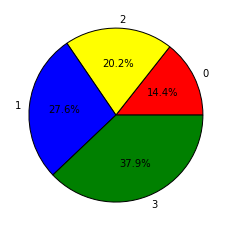

In [ ]:

percents = df_classes.tweet
labels = df_classes.label
colors = ['red','yellow','blue', 'green', '#26DE81']

my_pie,_,_ = plt.pie(percents,radius = 1,labels=labels,colors=colors,autopct="%.1f%%")
plt.setp(my_pie, width=1, edgecolor='black')
plt.show()

In [ ]:
# ÿ™ÿßÿ®ÿπ ŸäŸÇŸàŸÖ ÿ®ÿ•ÿ±ÿ¨ÿßÿπ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™ ÿßŸÑÿÆÿßÿµÿ© ÿ®ÿµŸÜŸÅ ŸÖÿπŸäŸÜ
#  ÿßŸÑÿØÿÆŸÑ : ÿßŸÑÿµŸÜŸÅ ÿßŸÑŸÖÿ±ÿßÿØ ÿ•ÿ±ÿ¨ÿßÿπ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™ ÿßŸÑÿÆÿßÿµÿ© ÿ®Ÿá
# ÿßŸÑÿÆÿ±ÿ¨ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™ ÿßŸÑŸÖÿ™ÿπŸÑŸÇÿ© ÿ®ÿ∞ŸÑŸÉ ÿßŸÑÿµŸÜŸÅ

def get_label_tweets(label,df,textfield):
  label_tweets = df[df['label'] == label][textfield]
  tweets_list = [str(tweet) for tweet in label_tweets]
  return tweets_list
#============================================================================

###Testing function
### ŸÖÿ´ÿßŸÑ ŸÑÿ•ÿ±ÿ¨ÿßÿπ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™ ÿßŸÑŸÖÿπÿßÿ±ÿ∂ÿ© ŸÑŸÑŸÇÿßÿ≠
get_label_tweets(0,df,'cleaned_tweet')[:5]



['ŸÖÿßÿ™ÿ¥ŸàŸÅŸàŸÜ ŸàÿßŸÇÿπ ŸÉÿ´Ÿäÿ± ŸÜÿßÿ≥ ÿÆÿ∞Ÿä ÿ¨ÿ±ÿπŸá ŸàÿßÿµŸäÿ®Ÿàÿß ŸÇÿßÿ≠ ÿÆŸÅŸä ŸÖÿ±ÿ∂ ŸÑÿßŸäŸÖŸÜÿπŸá ŸàŸÑÿßŸäŸÖŸÜÿπ ÿπÿØŸàŸä ÿπÿØ ŸÑŸäÿ¥ ÿßÿ≠ÿßÿ∑ ŸÜŸÅÿ≥ ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿØÿßŸàŸÖ ÿπÿßŸÑŸÖ ŸÖÿ™ÿÆŸàŸÅ',
 'ÿßŸÖÿ±ÿßŸá ÿπÿ¥ÿ±ŸäŸÜ ÿπŸÖÿ± ÿßŸäÿßŸÖ ÿ¨ÿ±ÿπŸá ÿßŸàŸÑŸä ÿßÿ≥ÿ™ÿ±ÿßÿ≤ŸäŸÜŸäŸÉÿß ÿµÿØÿßÿπ ÿ¥ÿØŸäÿØ ÿ∞ŸÖŸá ŸÖÿßÿØŸá ÿ®Ÿäÿ∂ÿßÿ° ŸÇÿ¥ÿ± ŸÜÿ≤ŸäŸÅ ÿπŸÜŸÉÿ®Ÿàÿ™ ÿßŸÜÿ≥ÿØÿßÿØ ÿ¨ÿ≤ÿ° ÿ¨Ÿäÿ® ÿ≥ŸáŸÖ ÿπŸÑŸà ÿ™ÿÆÿ´ÿ± ŸÜÿßÿ¨ŸÖ ŸÇÿßÿ≠ ŸÜŸÇÿµ ÿµŸÅŸäÿ≠',
 'ÿ™ÿ¨ÿ±ÿ®Ÿá ŸÉÿ± ŸÅÿßŸäÿ±Ÿàÿ≥ ÿßŸÜŸÅŸÑŸàŸÜÿ≤ÿß ŸÖŸàÿ≥ŸÖ ÿµŸÑÿ≠ ŸÖÿπŸä ŸÑŸÇÿßÿ≠ ŸÖÿ™ÿ≠Ÿàÿ± ŸÖÿ™ÿ∫Ÿäÿ± ŸàÿßŸÇÿπ ÿßŸÉÿØ ŸÉŸàŸÅŸäÿØ Ÿ°Ÿ© ÿØŸÑ ÿ≥ÿßÿ±ÿ≥ ÿßŸÑÿ®',
 'ŸÖŸÅÿ±Ÿàÿ∂ ÿ≠ÿØ ÿßŸÜÿ¨ÿ®ÿ± ÿ™ÿ∑ÿπŸäŸÖ ŸÑÿßŸÜ Ÿàÿßÿ≠ÿØ ŸÇÿßÿØÿ± Ÿáÿ™ŸÖ ÿµÿ≠Ÿá ÿßÿ¨ÿ®ÿßÿ± ŸÑŸáÿß ŸàŸÉŸäŸÑ',
 'ÿ≥ŸÑÿßŸÖ ÿ¥ŸÉŸàŸä ÿ®ÿÆÿµŸàÿµ ŸÑŸÇÿßÿ≠ ŸÉÿßÿ±']

In [ ]:
# ÿ™ÿßÿ®ÿπ ŸäŸÇŸàŸÖ ÿ®ÿ•ÿ±ÿ¨ÿßÿπ ŸÉŸÑ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™ Ÿàÿ™ÿ¨ŸÖŸäÿπŸáÿß ŸÅŸä ŸÑŸäÿ≥ÿ™ÿß
def get_all_tweets(df,text_field):
  all_tweets = [str(tweet) for tweet in df[text_field]]
  return all_tweets


## [3.2] N-Grams


In [ ]:

def bag_of_words(text,ngram, gram_name):
  cv = CountVectorizer(ngram_range=(ngram,ngram), max_features=1000)
  bagOfWords = cv.fit_transform(text)
  sum_words = bagOfWords.sum(axis=0)
  words_freq = {word: sum_words[0, i] for word, i in cv.vocabulary_.items()}
  res = {get_display(arabic_reshaper.reshape(k)): v for k,v in words_freq.items()}
  #df_gram = pd.DataFrame(res2.items(), columns=[get_ngram, 'Freq'])
  df_gram = pd.DataFrame({gram_name: list(res.keys()), 'Freq': list(res.values())})
  return df_gram
#==========================================================================
def draw_histogram(df ,title):
  plt.figure(figsize=(20, 10))
  histogram = seb.barplot(data=df, x =title, y = 'Freq')
  histogram.set_xticklabels(histogram.get_xticklabels(), rotation=30)
  plt.show()
#=========================================================================

def get_ngram(text,ngram, mx):
  df_gram = bag_of_words(text,ngram, str(ngram)+'-gram')
  df_gram = df_gram.nlargest(columns='Freq',n= mx)
  draw_histogram(df_gram, str(ngram)+'-gram')
#===========================================================================

def get_rare_words(text,ngram, mx):
  df_gram = bag_of_words(text, ngram, str(ngram)+'-gram')
  df_gram = df_gram.nsmallest(columns='Freq', n=mx)
  draw_histogram(df_gram,str(ngram)+'-gram')


#### Getting tweets for each class

In [ ]:
all_tweets =    get_all_tweets(df,'cleaned_tweet')
class0_tweets = get_label_tweets(0,df,'cleaned_tweet')
class1_tweets = get_label_tweets(1,df,'cleaned_tweet')
class2_tweets = get_label_tweets(2,df,'cleaned_tweet')
class3_tweets = get_label_tweets(3,df,'cleaned_tweet')




### [3.2.1] 1-Gram most frequently in all tweets


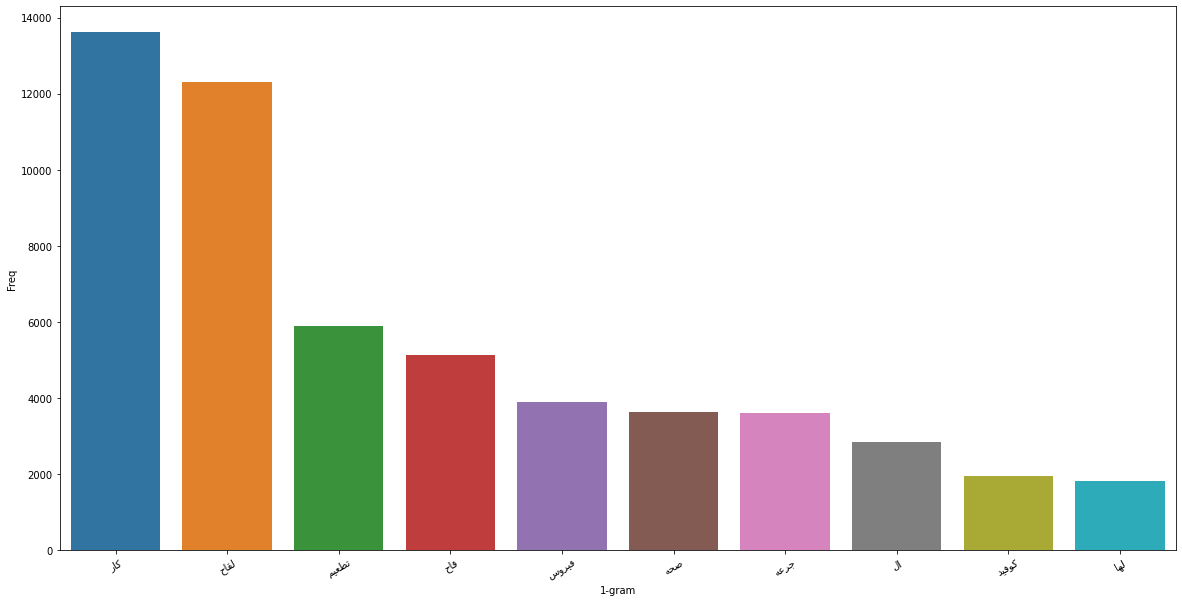

In [ ]:
get_ngram(all_tweets,1,10)

### [3.2.2] 1-Gram least frequently in all tweets


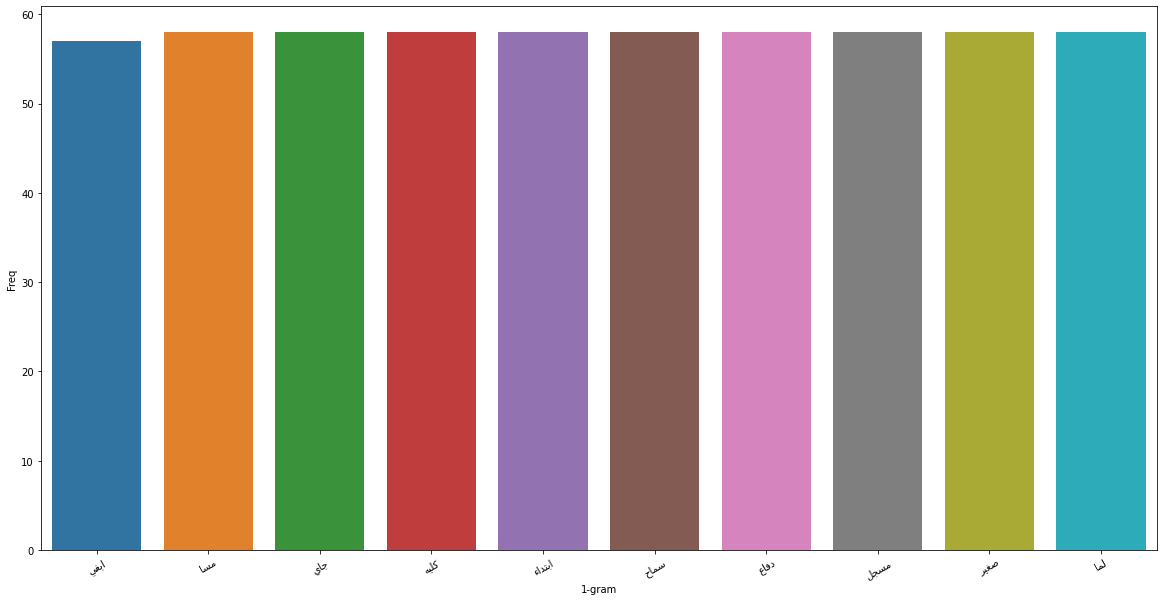

In [ ]:
get_rare_words(all_tweets,1,10)

### [3.2.3] 2-Gram most frequently in all tweets


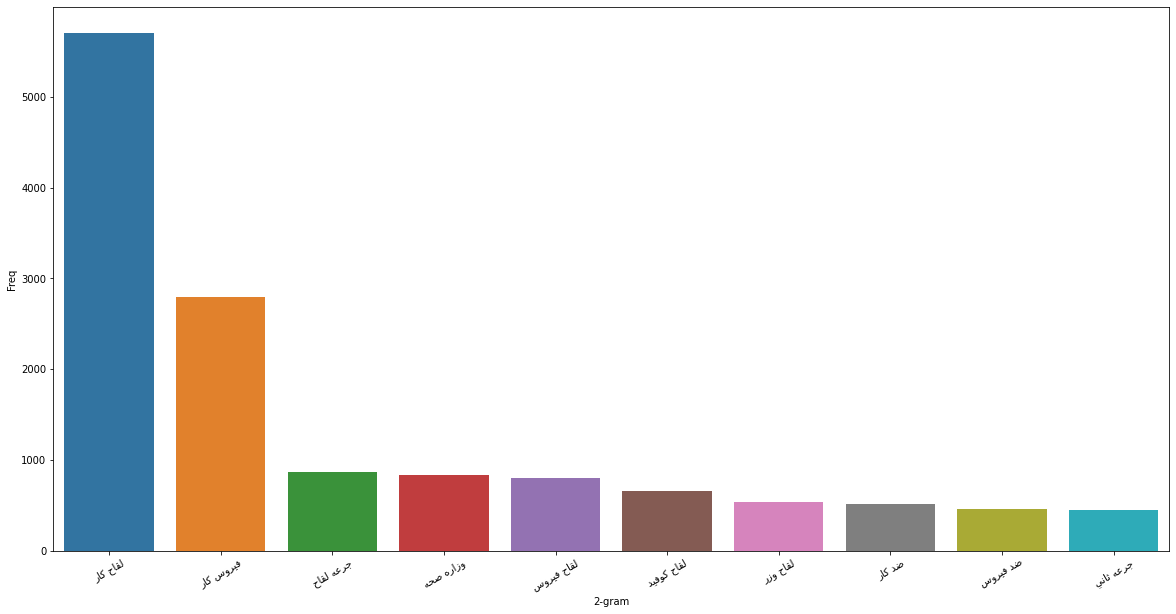

In [ ]:
get_ngram(all_tweets,2,10)

### [3.2.4] 2-Gram least frequently in all tweets


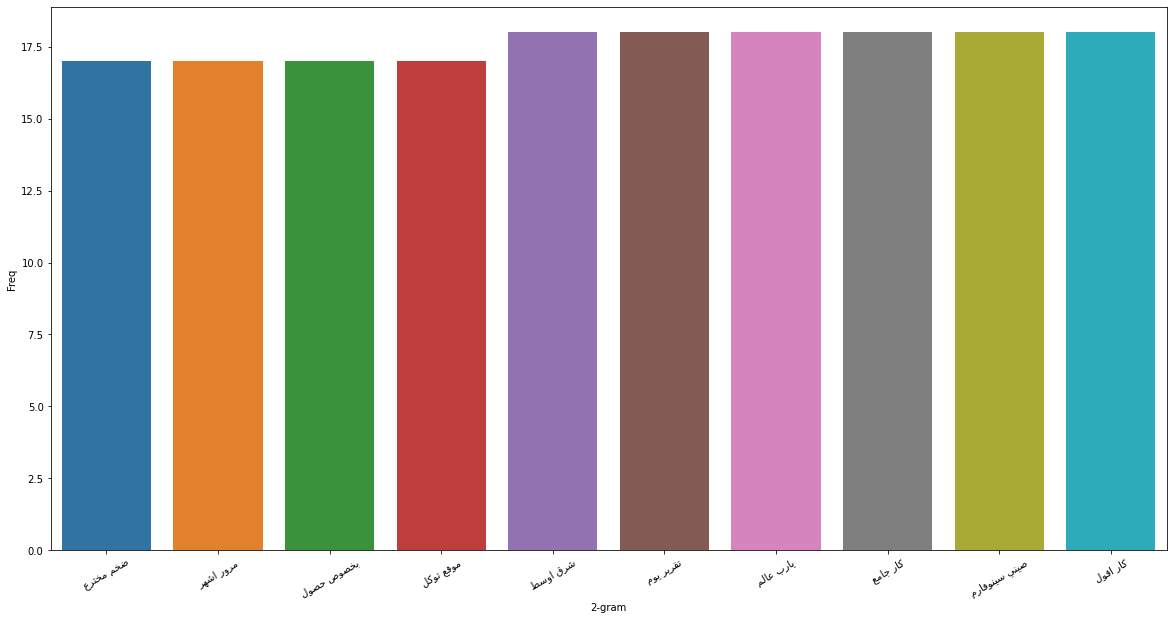

In [ ]:
get_rare_words(all_tweets,2,10)

### [3.2.5] 3-Gram Most frequently in all tweets


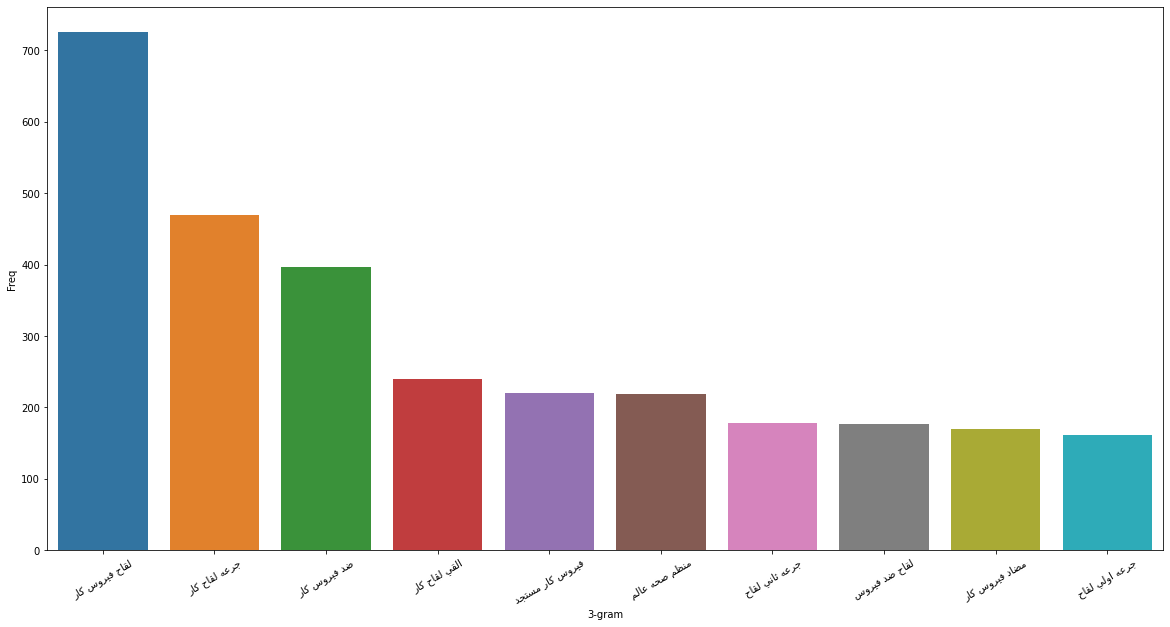

In [ ]:
get_ngram(all_tweets,3,10)

### [3.2.6] 3-Gram least frequently in all tweets


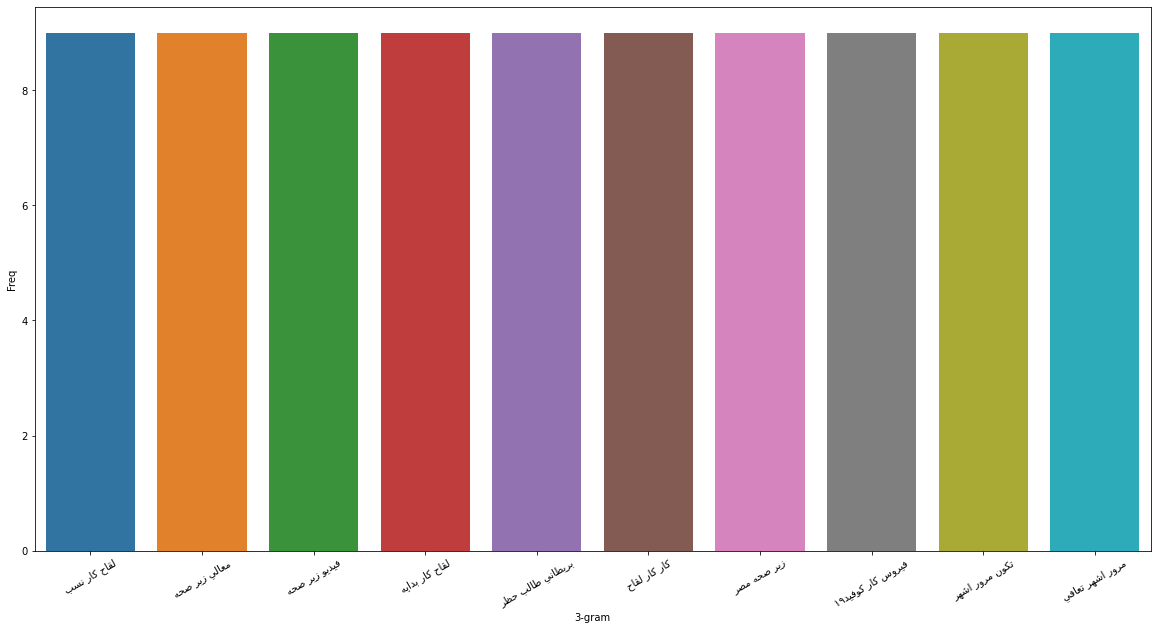

In [ ]:
get_rare_words(all_tweets,3,10)

### [3.2.7] words most frequently class_0 tweet


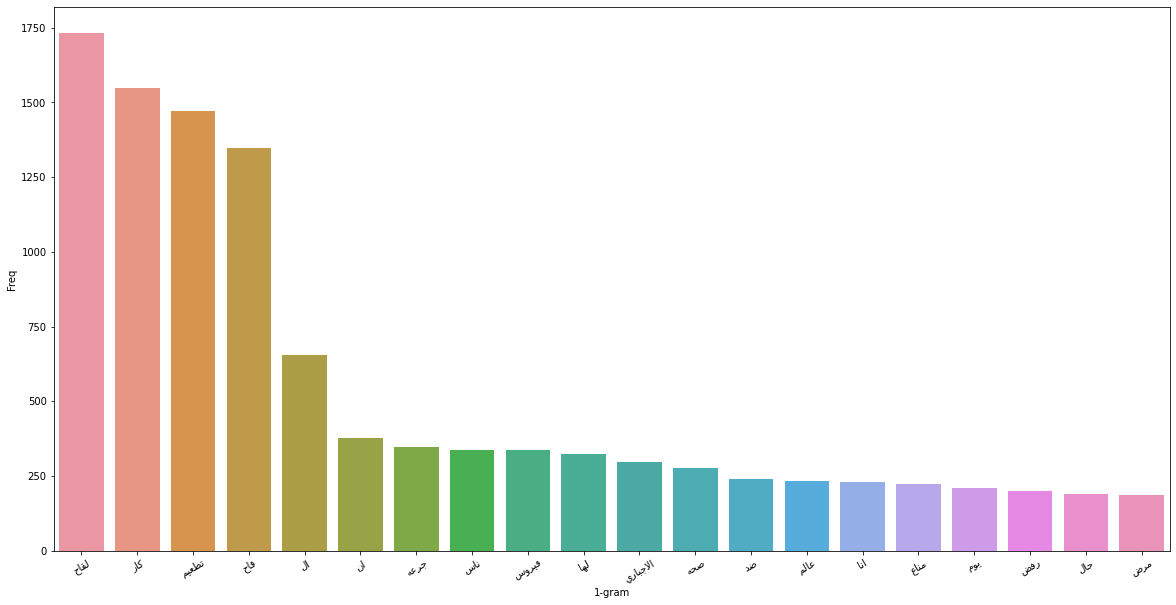

In [ ]:
get_ngram(class0_tweets,1,20)

ŸÜŸÑÿßÿ≠ÿ∏ ÿ∏ŸáŸàÿ± ŸÉŸÑŸÖÿßÿ™ ŸÖÿ´ŸÑ ÿ•ÿ¨ÿ®ÿßÿ±Ÿä - ÿ±ŸÅÿ∂ - ÿ∂ÿØ

### [3.2.8] words most frequently in class_1 tweets


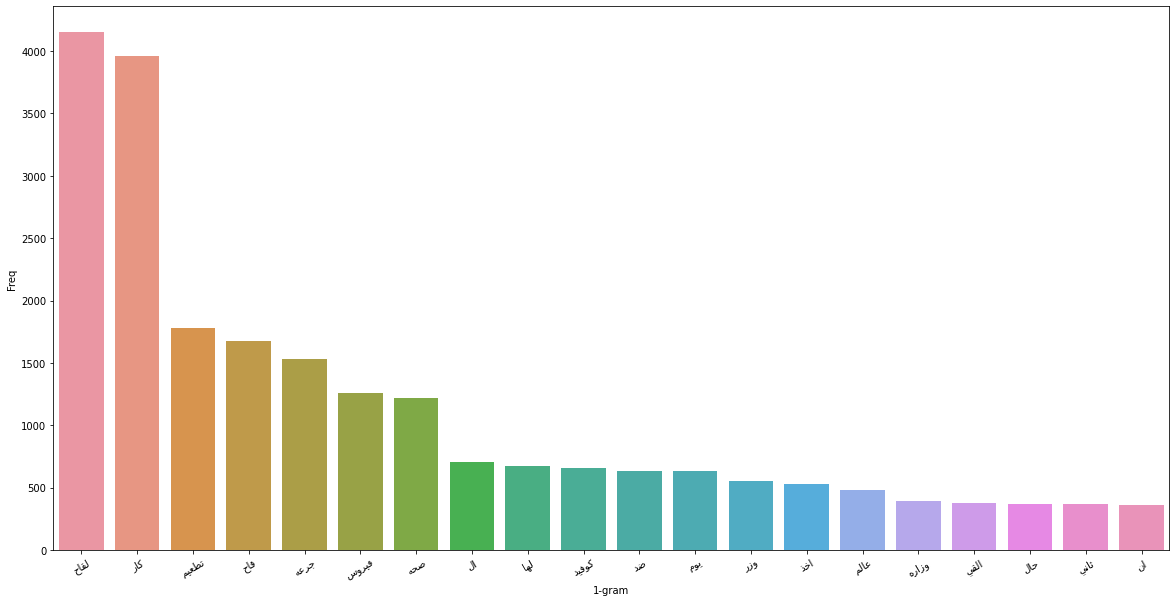

In [ ]:
get_ngram(class1_tweets,1,20)

### [3.2.9] words most frequently in class_2 tweets


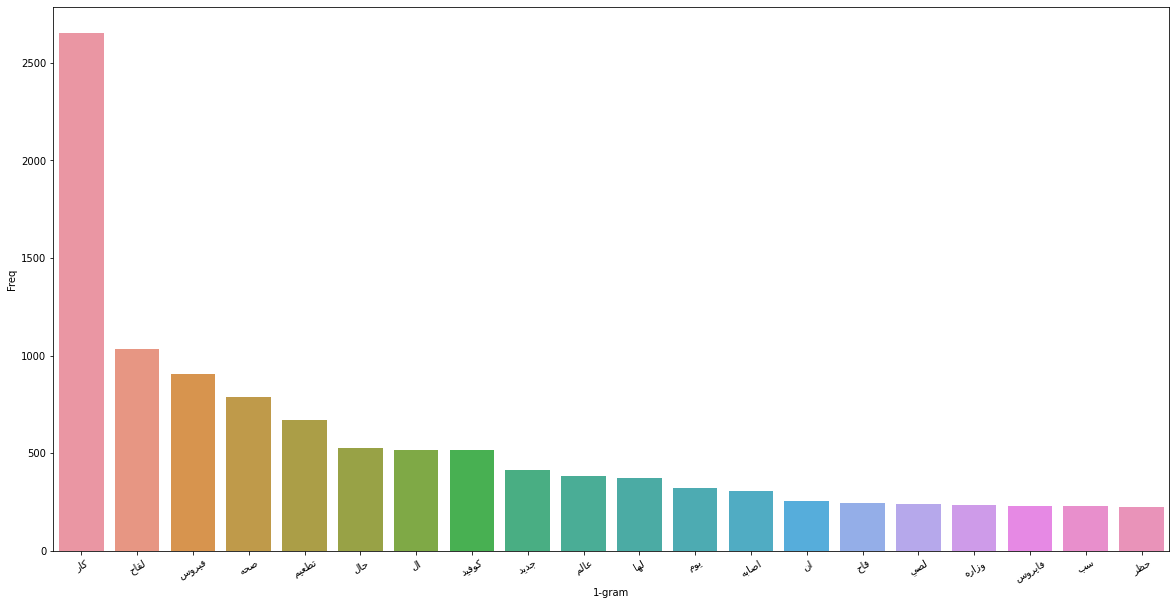

In [ ]:
get_ngram(class2_tweets,1,20)

### [3.2.10] words most frequently class_3 tweets


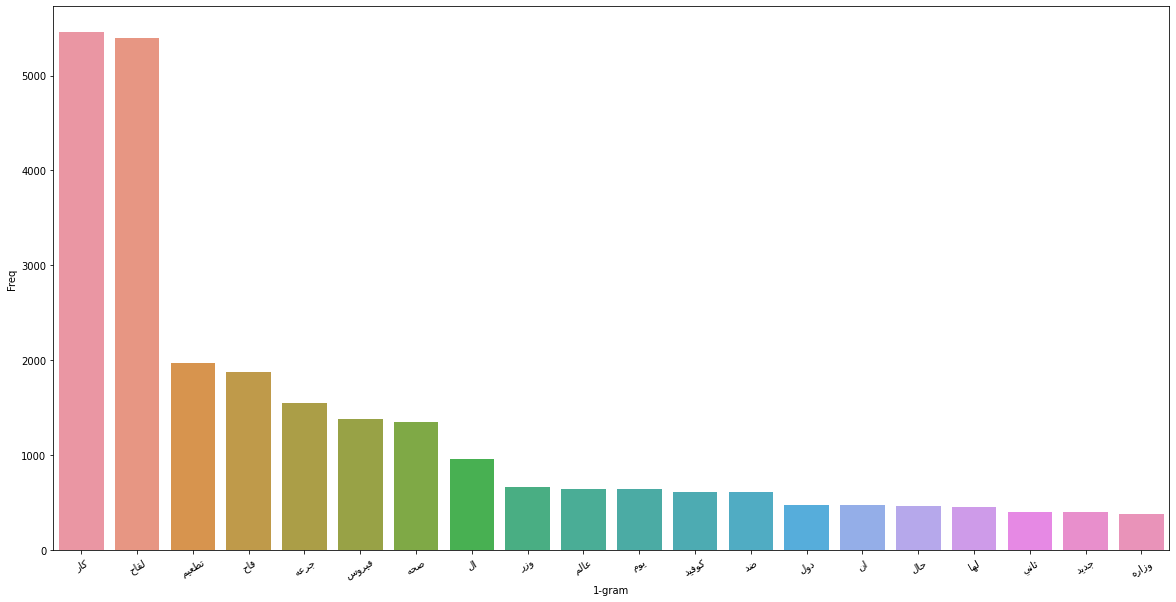

In [ ]:
get_ngram(class3_tweets,1,20)

## [3.3] Histogram for tweets lengths  


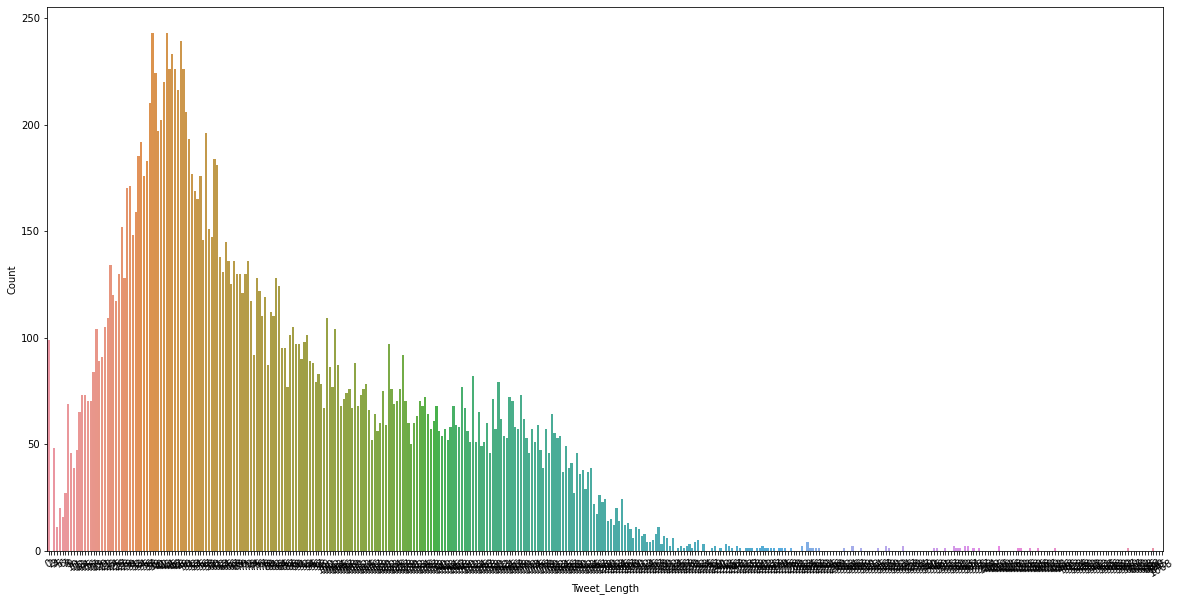

In [ ]:
# ÿ™ÿßÿ®ÿπ Ÿäÿ±ÿØ ŸÇÿßŸÖŸàÿ≥ Ÿäÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ÿ∑ŸàŸÑ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿ© ŸàÿπÿØÿØ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™ ÿßŸÑŸÖÿ≥ÿßŸàŸäÿ© ŸÑŸáÿ∞ÿß ÿßŸÑÿ∑ŸàŸÑ

def length_freqs(df,text_field):
  all_tweets = get_all_tweets(df,text_field)
  length_dic = {}
  for tweet in all_tweets:
    length = len(tweet)
    if length not in length_dic:
      length_dic[length] = 0
    else :
      length_dic[length] += 1
  return length_dic


def draw_length_histogram(df,text_field):
  length_dic = length_freqs(df,text_field)
  length_df = pd.DataFrame({'Tweet_Length':list(length_dic.keys()), 'Count':list(length_dic.values())})
  plt.figure(figsize=(20, 10))
  histogram = seb.barplot(data=length_df, x = 'Tweet_Length', y = 'Count')
  histogram.set_xticklabels(histogram.get_xticklabels(), rotation=30)
  plt.show()

draw_length_histogram(df,'cleaned_tweet')

## [3.4] Hashtags  


In [ ]:
# ÿßŸÑÿØÿÆŸÑ ŸÑŸäÿ≥ÿ™ÿß ŸÖŸÜ ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™
# ÿßŸÑÿÆÿ±ÿ¨ ŸÑŸäÿ≥ÿ™ÿß ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ŸÉŸÑ ÿßŸÑŸáÿßÿ¥ÿ™ÿßÿ∫ÿßÿ™ ÿßŸÑŸÖŸàÿ¨ŸàÿØÿ© ŸÅŸä ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØÿßÿ™

def get_hashtag(tweets):
  hashs = []
  for t in tweets:
      ht = re.findall(r'#(\w+)', t)
      if len(ht)!=0:
        for h in ht:
          hashs.append(h)
  return hashs
#=============================================================================

# Ÿäÿ±ÿ≥ŸÖ ÿßŸÑŸáŸäÿ≥ÿ™Ÿàÿ∫ÿ±ÿßŸÖ ŸÑŸÑŸáÿßÿ¥ÿ™ÿßÿ∫ÿßÿ™ ÿßŸÑŸÖŸÉÿ±ÿ±ÿ©
# nltk.FreqDist  ŸäŸÇŸàŸÖ ÿ®ÿ≠ÿ≥ÿßÿ® ÿ™ŸÉÿ±ÿßÿ± ŸÉŸÑ Ÿáÿßÿ¥ÿ™ÿßÿπ
# ÿ™ÿÆÿ≤ŸäŸÜ ŸÉŸÑ Ÿáÿßÿ¥ÿ™ÿßÿ∫ ŸàÿßŸÑÿ™ŸÉÿ±ÿßÿ± ÿßŸÑÿÆÿßÿµ ŸÅŸäŸá ÿØÿßÿ™ÿß ŸÅÿ±ŸäŸÖ
# ÿ™ÿ±ÿ™Ÿäÿ® ÿßŸÑÿØÿßÿ™ÿß ŸÅÿ±ŸäŸÖ ÿ™ŸÜÿßÿ≤ŸÑŸäÿß ÿ®ŸÜÿßÿ° ÿπŸÑŸâ ÿπÿØÿØ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±ÿßÿ™

def draw_hashtag_histogram(tweets,number):
  hashs = get_hashtag(tweets)
  ht_freq = nltk.FreqDist(hashs)
  res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in ht_freq.items()}
  hashs_df = pd.DataFrame(res2.items(), columns=['Hashtag', 'Count'])
  #ht_dframe = pd.DataFrame({'Hashtag':list(hashs_df.keys()), 'Count':list(hashs_df.values())})
  hashs_df = hashs_df.nlargest(columns='Count', n=number)
  plt.figure(figsize=(18, 8))
  histogram = seb.barplot(data=hashs_df, x = 'Hashtag', y = 'Count')
  histogram.set_xticklabels(histogram.get_xticklabels(), rotation=30)
  plt.show()
#==============================================================================

### [3.4.1] Hashtags most frequently in all tweets


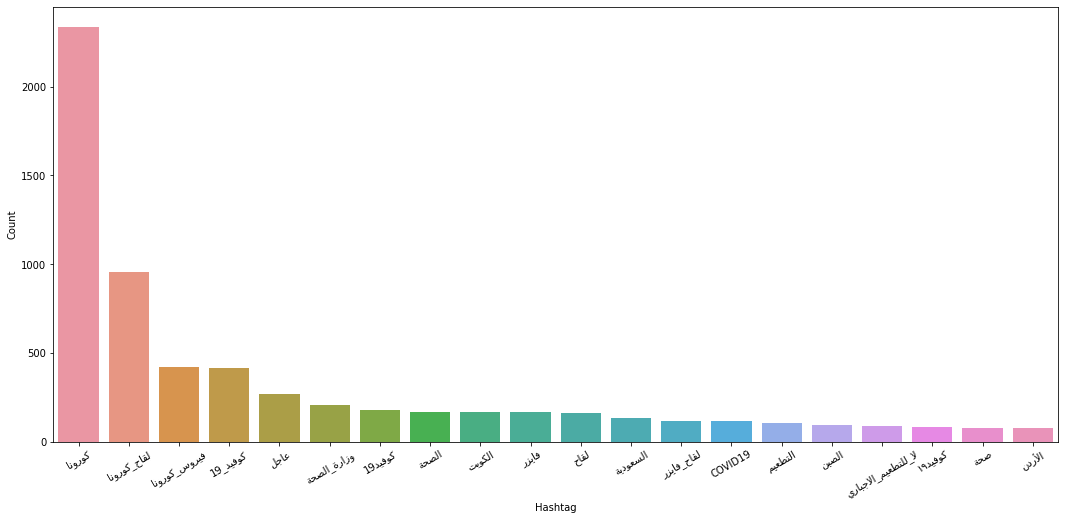

In [ ]:
all_tweets = get_all_tweets(df,'tweet')
draw_hashtag_histogram(all_tweets,20)

### [3.4.2] Hashtags most frequently in class_0 tweets


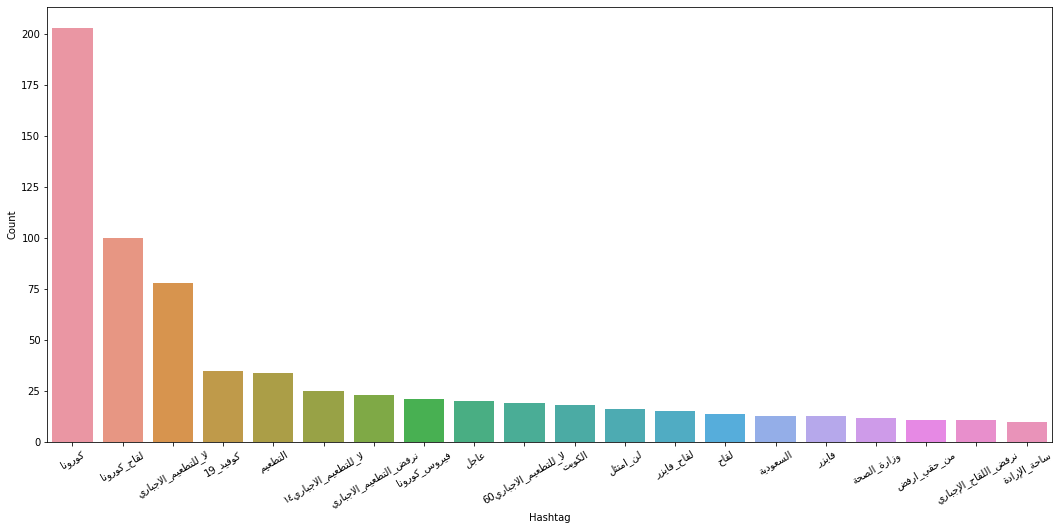

In [ ]:
neg_tweets = get_label_tweets(0,df,'tweet')
draw_hashtag_histogram(neg_tweets,20)

### [3.4.3] Hashtags most frequently in class_1 tweets


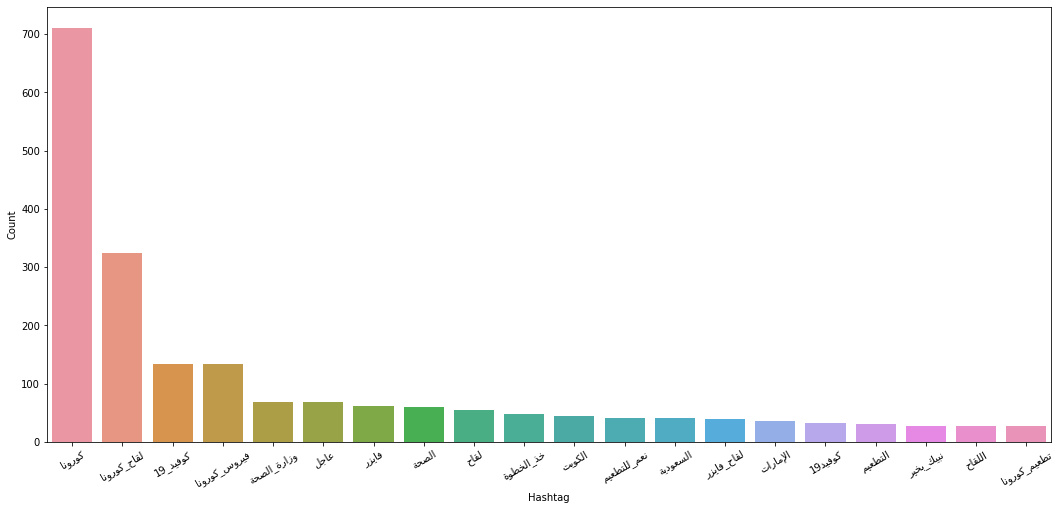

In [ ]:
pos_tweets = get_label_tweets(1,df,'tweet')
draw_hashtag_histogram(pos_tweets,20)

### [3.4.4] Hashtags most frequently in class_2 tweets


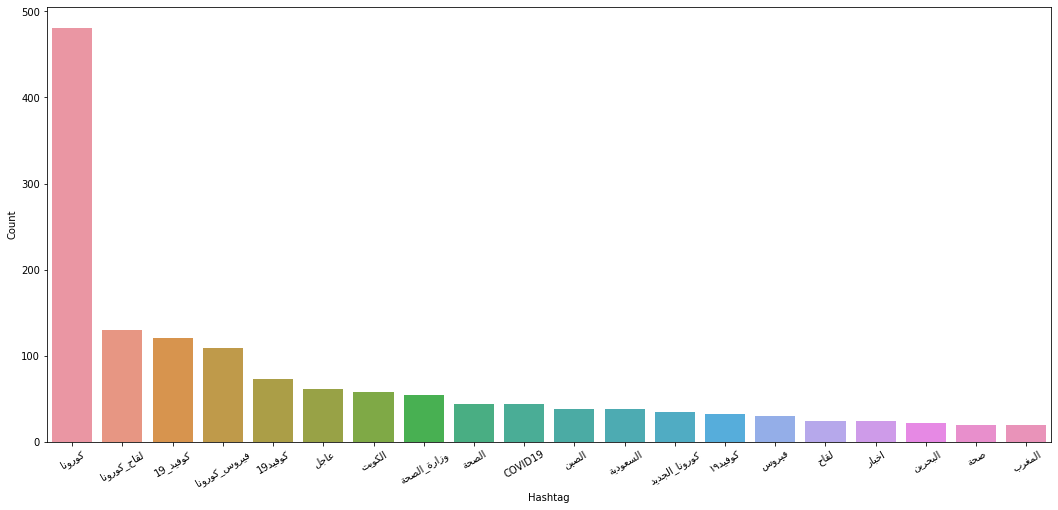

In [ ]:
non_related_tweets = get_label_tweets(2,df,'tweet')
draw_hashtag_histogram(non_related_tweets,20)

### [3.4.5] Hashtags most frequently in class_3 tweets


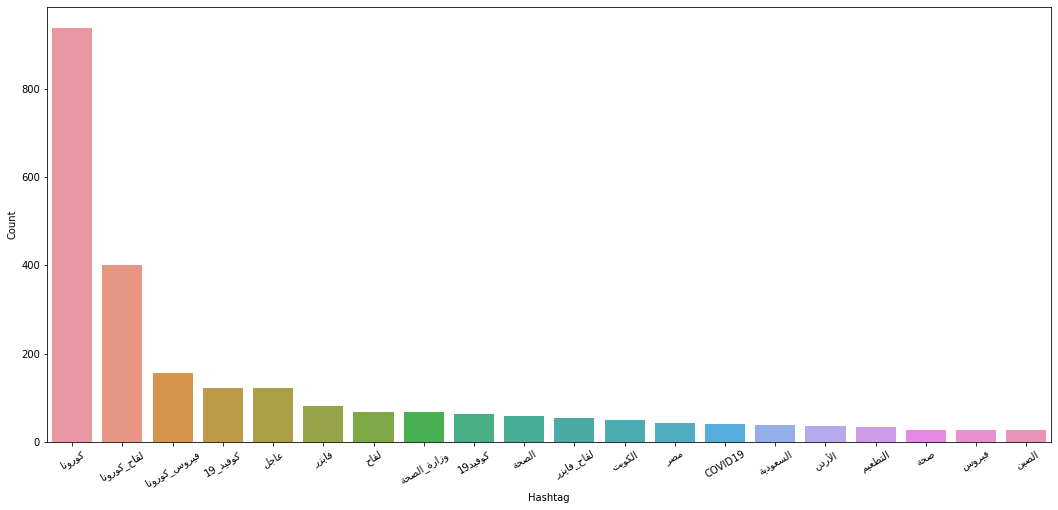

In [ ]:
neu_tweets = get_label_tweets(3,df,'tweet')
draw_hashtag_histogram(neu_tweets,20)